In [33]:
from pathlib import Path

import pandas as pd
import seaborn as sns

In [34]:
results_paths = list(Path("results").glob("*.csv"))
results_df = pd.concat([pd.read_csv(path, index_col=0) for path in results_paths],
                       names=["model"], keys=[path.stem for path in results_paths])
results_df

mse
model       layer           
nce         0      22.077182
            1      16.209729
            2      13.603695
            3      13.906278
            4      13.766873
            5      12.971253
            6      13.378414
            7      12.778578
            8      14.353943
            9      21.662229
autoencoder 0      22.078503
            1      16.205522
            2      13.603588
            3      13.908066
            4      13.765984
            5      12.969331
            6      13.378642
            7      12.782990
            8      14.354452
            9      21.662169

In [35]:
results_pivot = results_df.reset_index().pivot(index="layer", columns="model", values="mse")
results_pivot["MSE(NCE) - MSE(Autoencoder)"] = results_pivot["nce"] - results_pivot["autoencoder"]
results_pivot

model,autoencoder,nce,MSE(NCE) - MSE(Autoencoder)
layer,,,
0,22.078503,22.077182,-0.001321
1,16.205522,16.209729,0.004208
2,13.603588,13.603695,0.000106
3,13.908066,13.906278,-0.001788
4,13.765984,13.766873,0.000890
5,12.969331,12.971253,0.001922
6,13.378642,13.378414,-0.000228
7,12.782990,12.778578,-0.004412
8,14.354452,14.353943,-0.000510


Text(0.5, 1.0, 'HuBERT encoding analysis')

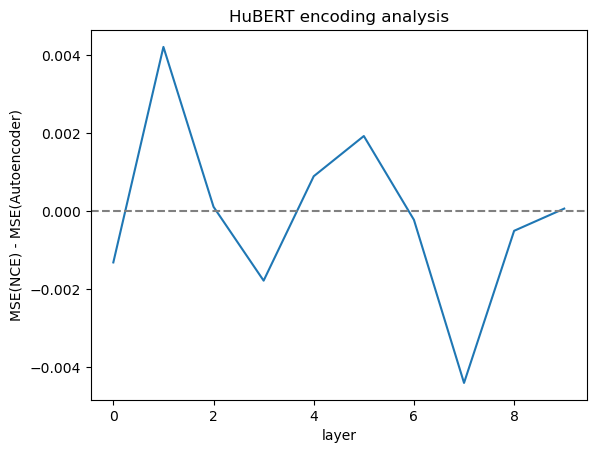

In [36]:
ax = sns.lineplot(data=results_pivot, x="layer", y="MSE(NCE) - MSE(Autoencoder)")
ax.axhline(0, ls="--", color="gray")
ax.set_title("HuBERT encoding analysis")